In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import warnings

import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [3]:
path = input()
df = pd.read_csv(path, sep=',')
df

C:\Users\Пользователь\OneDrive\Рабочий стол\flight_delays.csv


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


0.19044


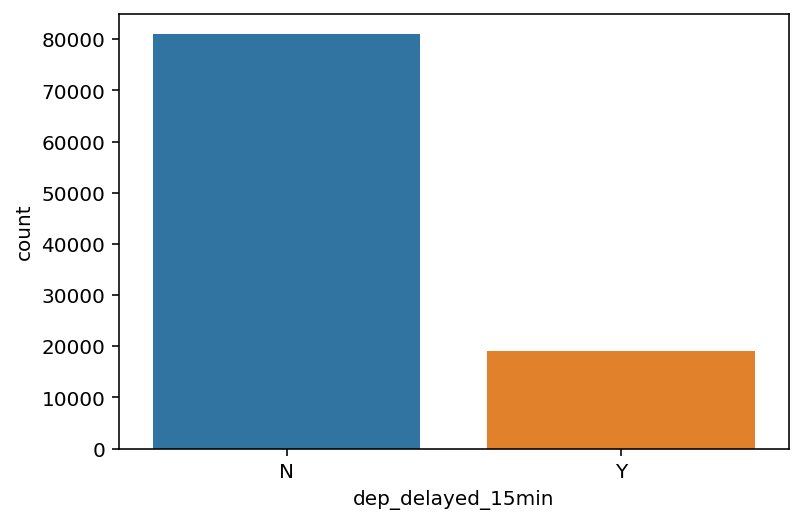

In [15]:
print(df[df['dep_delayed_15min'] == 'Y'].count()[0] / 100000)
_ = sns.countplot(x='dep_delayed_15min', data=df)

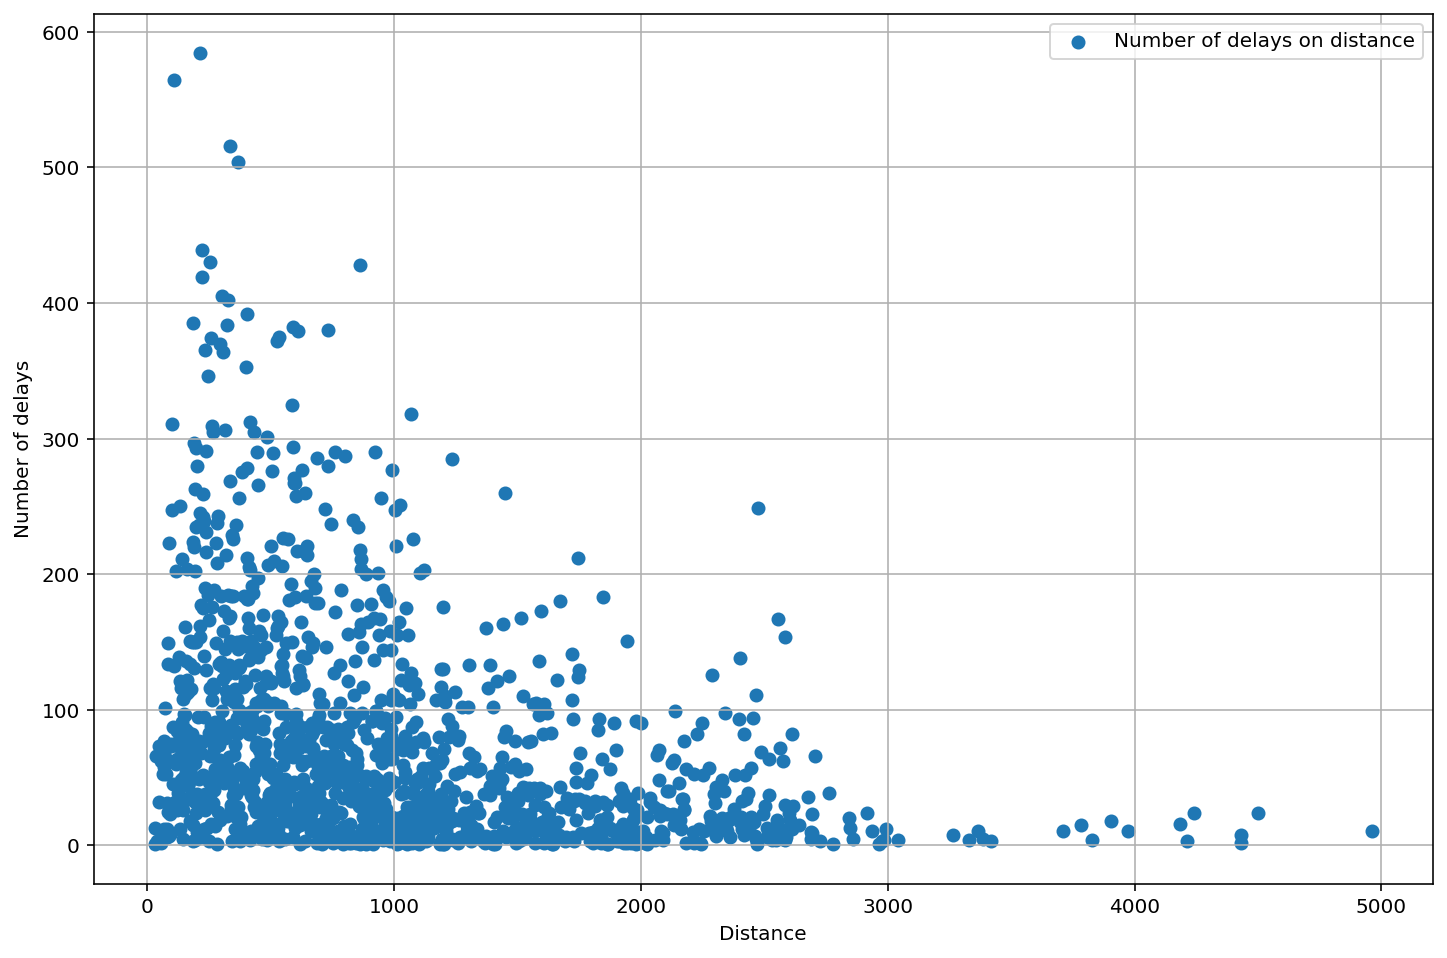

In [54]:
data = df.groupby('Distance').dep_delayed_15min.count()
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(data.index, data.tolist(), label="Number of delays on distance")
plt.legend()
plt.xlabel("Distance")
plt.ylabel("Number of delays")
plt.grid()
plt.show()

ATL
ORD
DFW
EWR
LAX


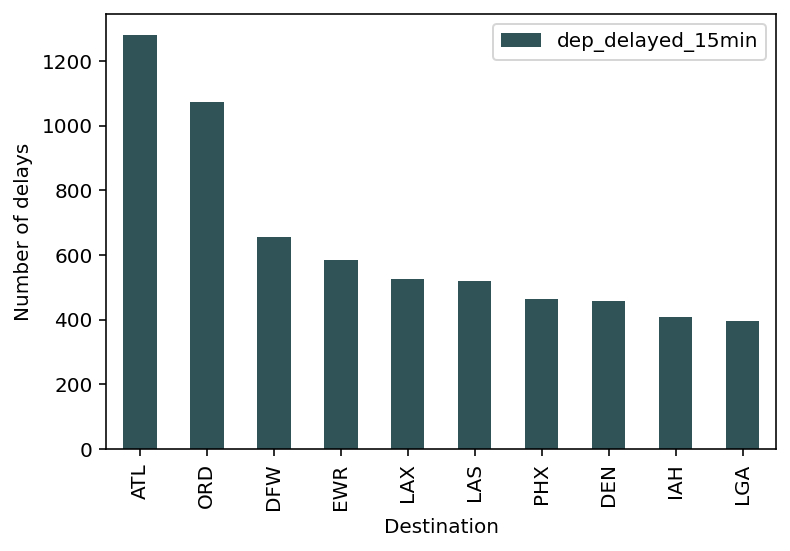

In [72]:
data1 = df[df['dep_delayed_15min'] == 'Y'].groupby('Dest').count().sort_values(by=['dep_delayed_15min'], ascending=False).head(5)
print('\n'.join(str(value) for value in data1.index.tolist()))

df[["Dest", "dep_delayed_15min"]][df['dep_delayed_15min'] == 'Y'].groupby('Dest').count().sort_values(by=['dep_delayed_15min'], ascending=False).head(10).plot(
    kind='bar',  color='#305358'
)
plt.ylabel("Number of delays")
plt.xlabel("Destination")
plt.legend()
plt.show()

Text(0, 0.5, 'Number of delays')

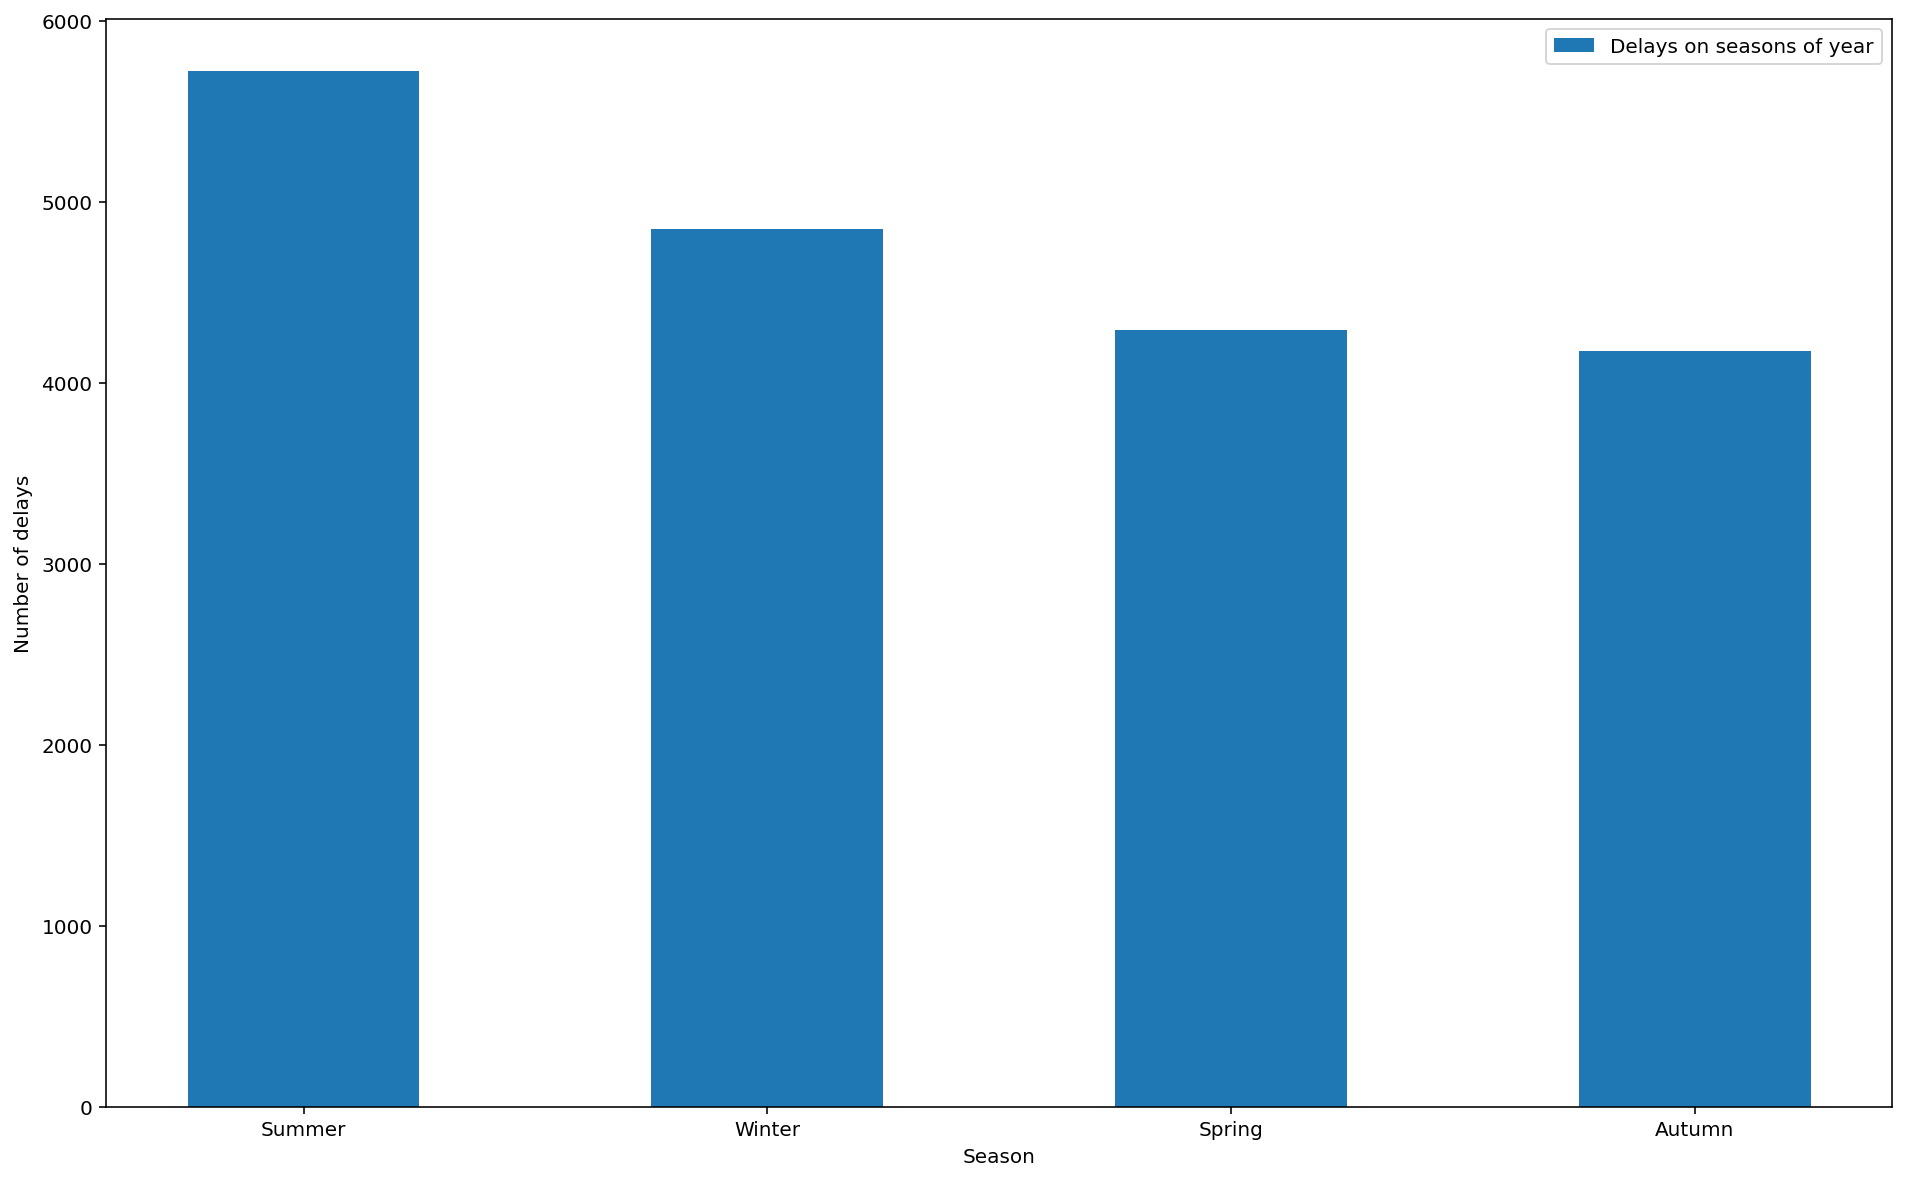

In [11]:
def month_to_season(x):   
    global season
    if x == "c-6" or x == "c-7" or x == "c-8":
            season = "Summer"
    elif x == "c-9" or x == "c-10" or x == "c-11":
            season = "Autumn"
    elif x == "c-12" or x == "c-1" or x == "c-2":
            season = "Winter"
    elif x == "c-3" or x == "c-4" or x == "c-5":
            season = "Spring"
    return season

df['Season'] = df['Month'].apply(lambda x : month_to_season(x))
arr = df[df['dep_delayed_15min'] == 'Y'].groupby('Season').count()[["dep_delayed_15min"]].sort_values(by=['dep_delayed_15min'], ascending=False)
arr=arr.iloc[:,0]

plt.figure(figsize=(16,10))
plt.bar(arr.index, arr.tolist(), width=.5, label = "Delays on seasons of year")
plt.xlabel("Season")
plt.legend()
plt.ylabel("Number of delays")

Text(0, 0.5, 'Number of delays')

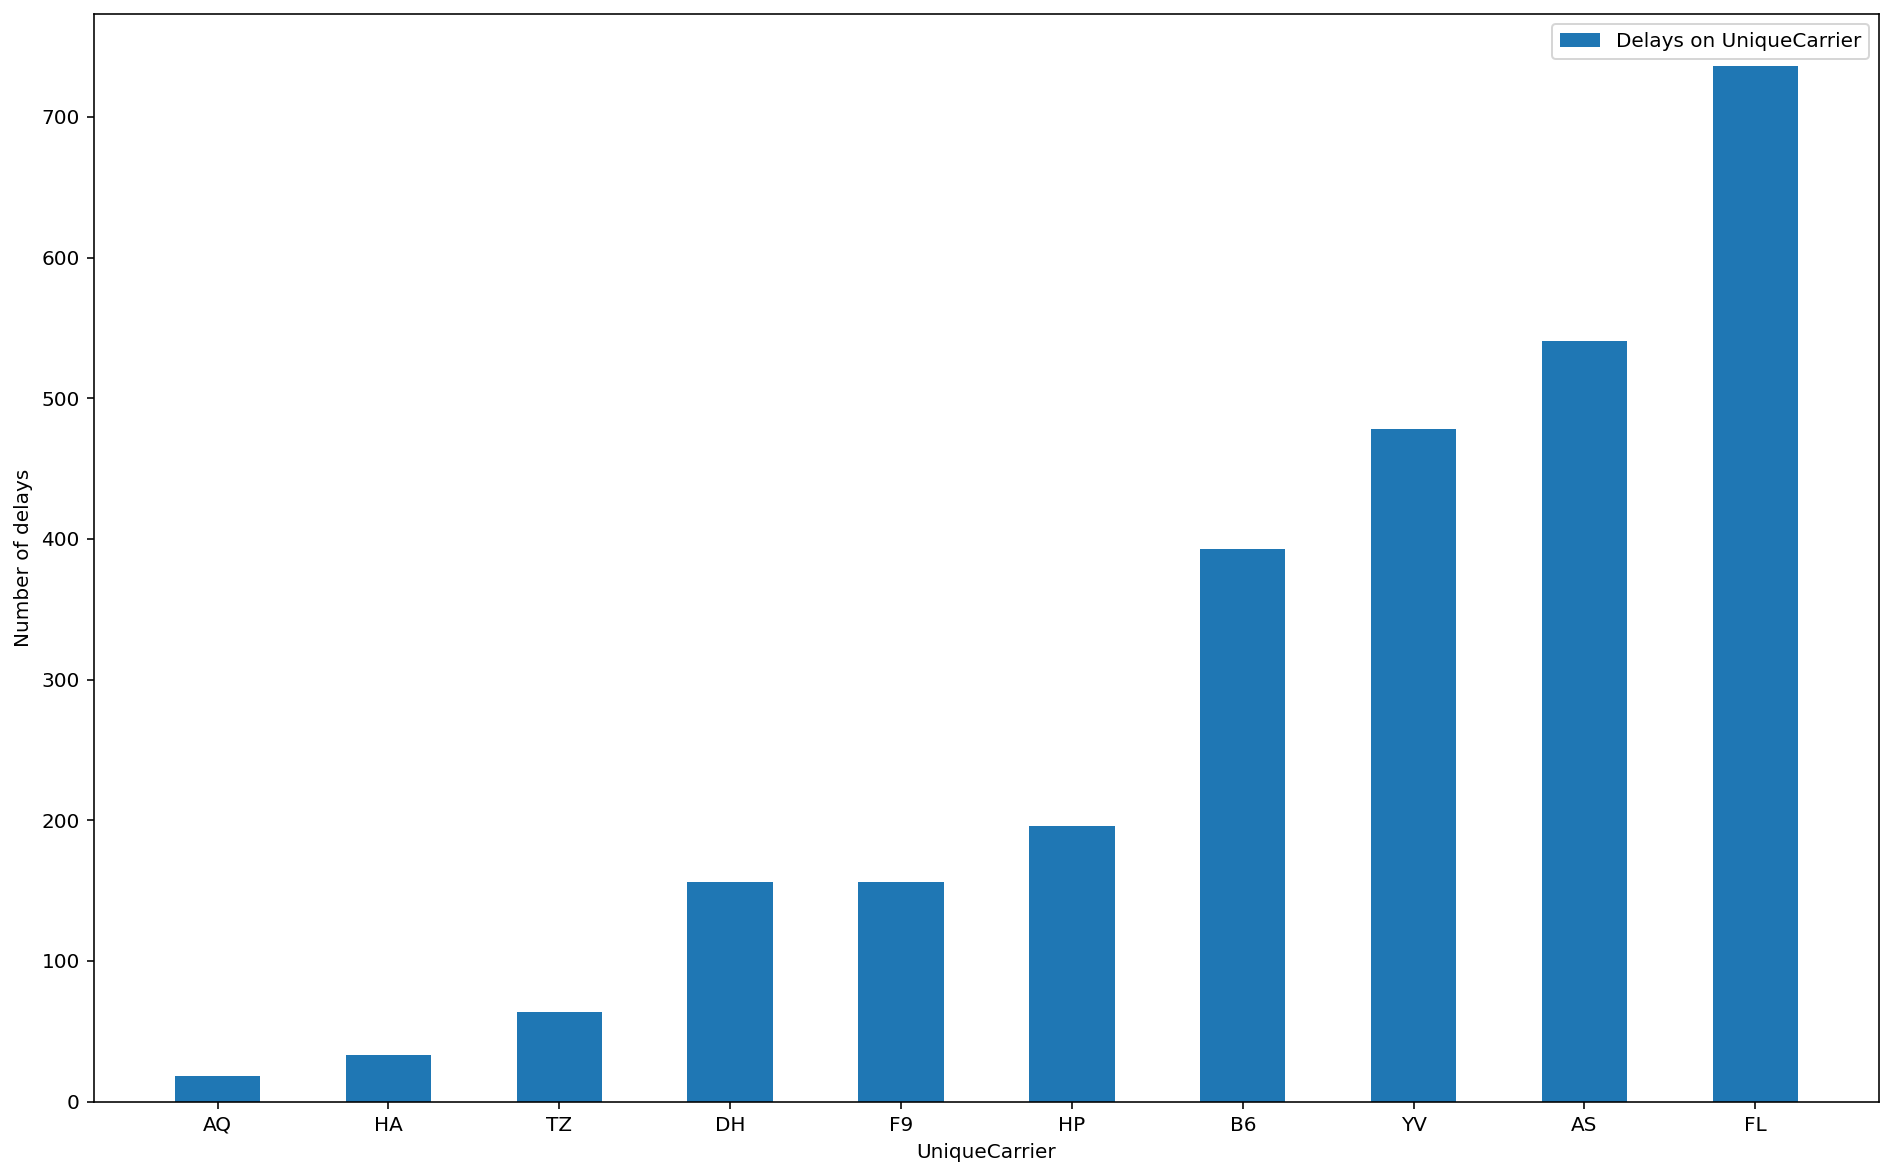

In [21]:
arr = df[df['dep_delayed_15min'] == 'Y'].groupby("UniqueCarrier").count().sort_values(by=['dep_delayed_15min'])[['dep_delayed_15min']].head(10)
arr=arr.iloc[:,0]
plt.figure(figsize=(16,10))
plt.bar(arr.index, arr.tolist(), width=.5, label = "Delays on UniqueCarrier")
plt.xlabel("UniqueCarrier")
plt.legend()
plt.ylabel("Number of delays")

Text(0, 0.5, 'Number of delays')

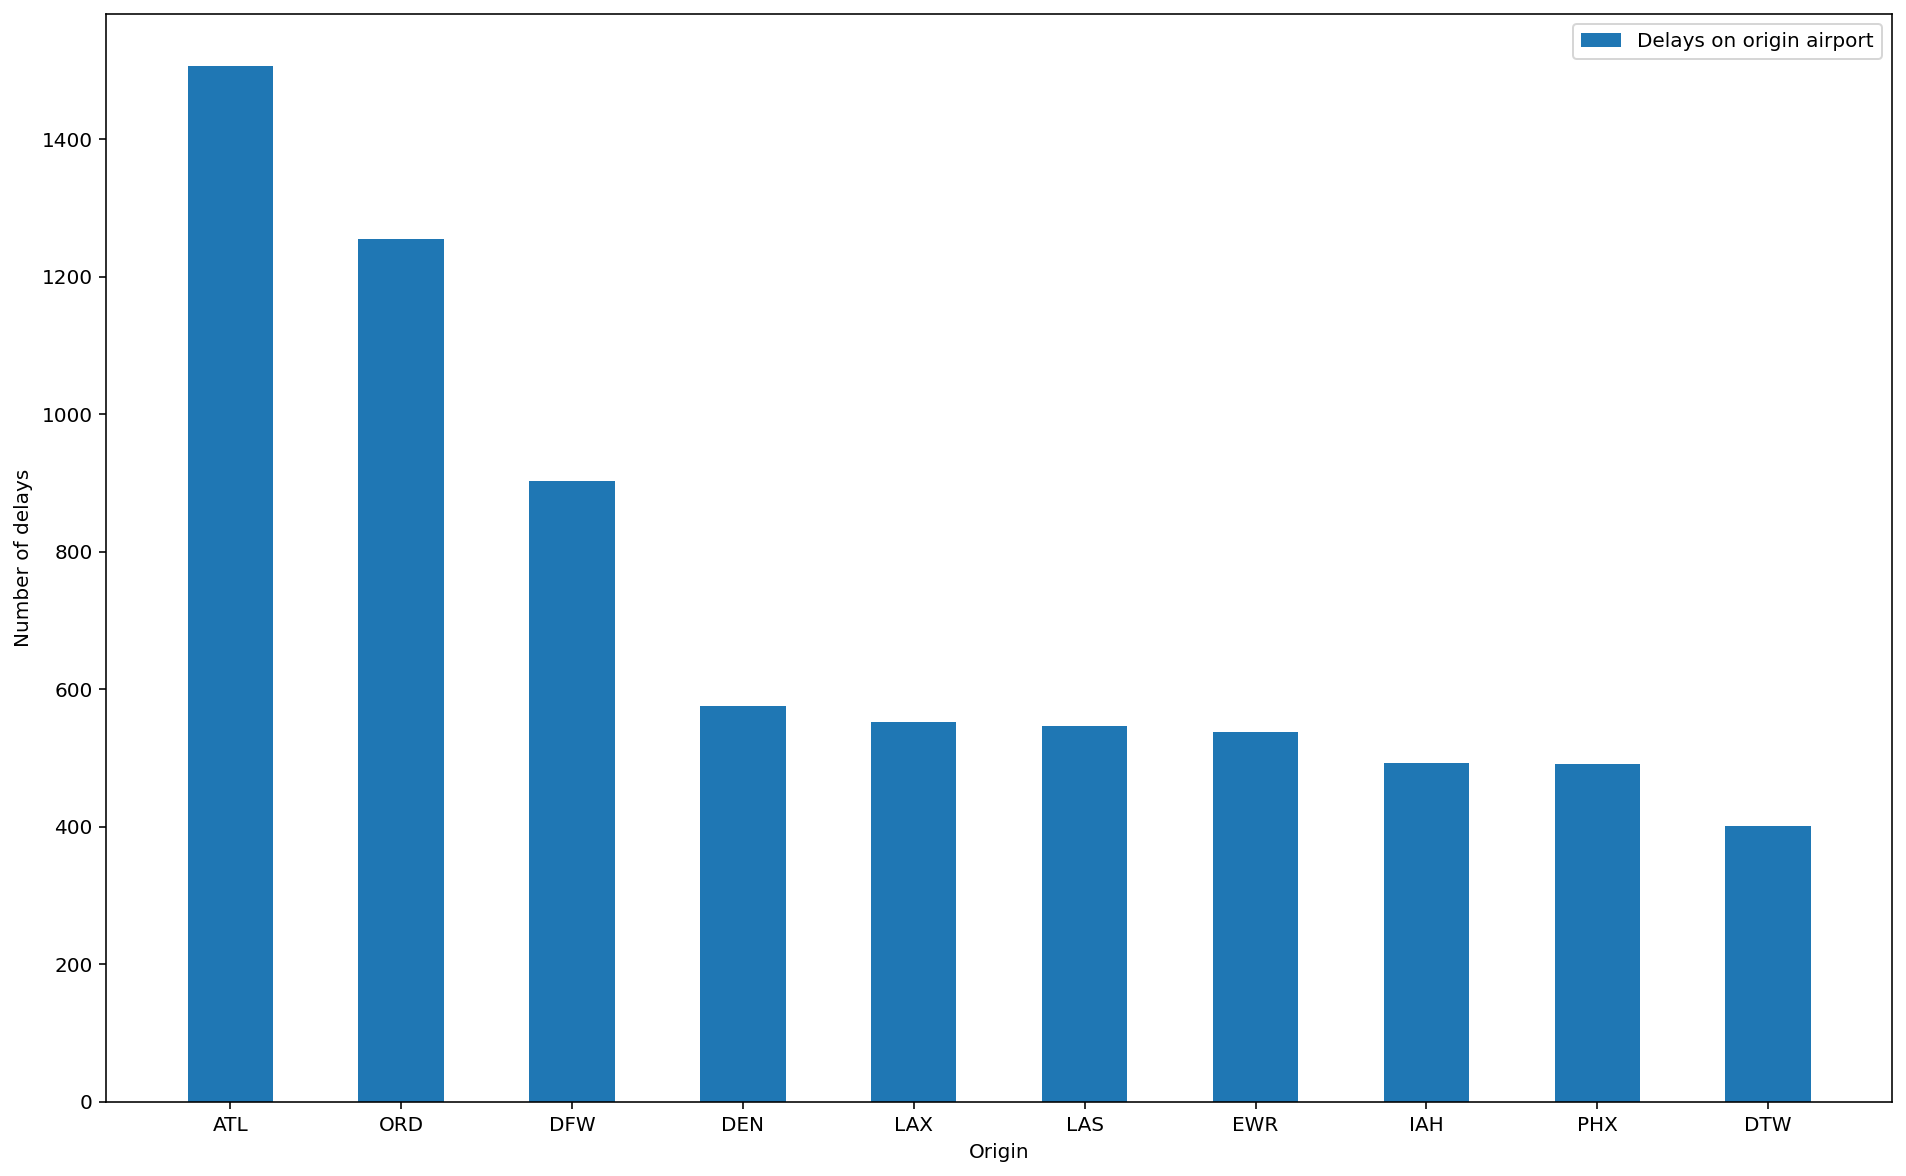

In [23]:
arr = df[df['dep_delayed_15min'] == 'Y'].groupby("Origin").count().sort_values(by=['dep_delayed_15min'], ascending = False)[['dep_delayed_15min']].head(10)
arr=arr.iloc[:,0]
plt.figure(figsize=(16,10))
plt.bar(arr.index, arr.tolist(), width=.5, label = "Delays on origin airport")
plt.xlabel("Origin")
plt.legend()
plt.ylabel("Number of delays")

Text(0, 0.5, 'Number of delays')

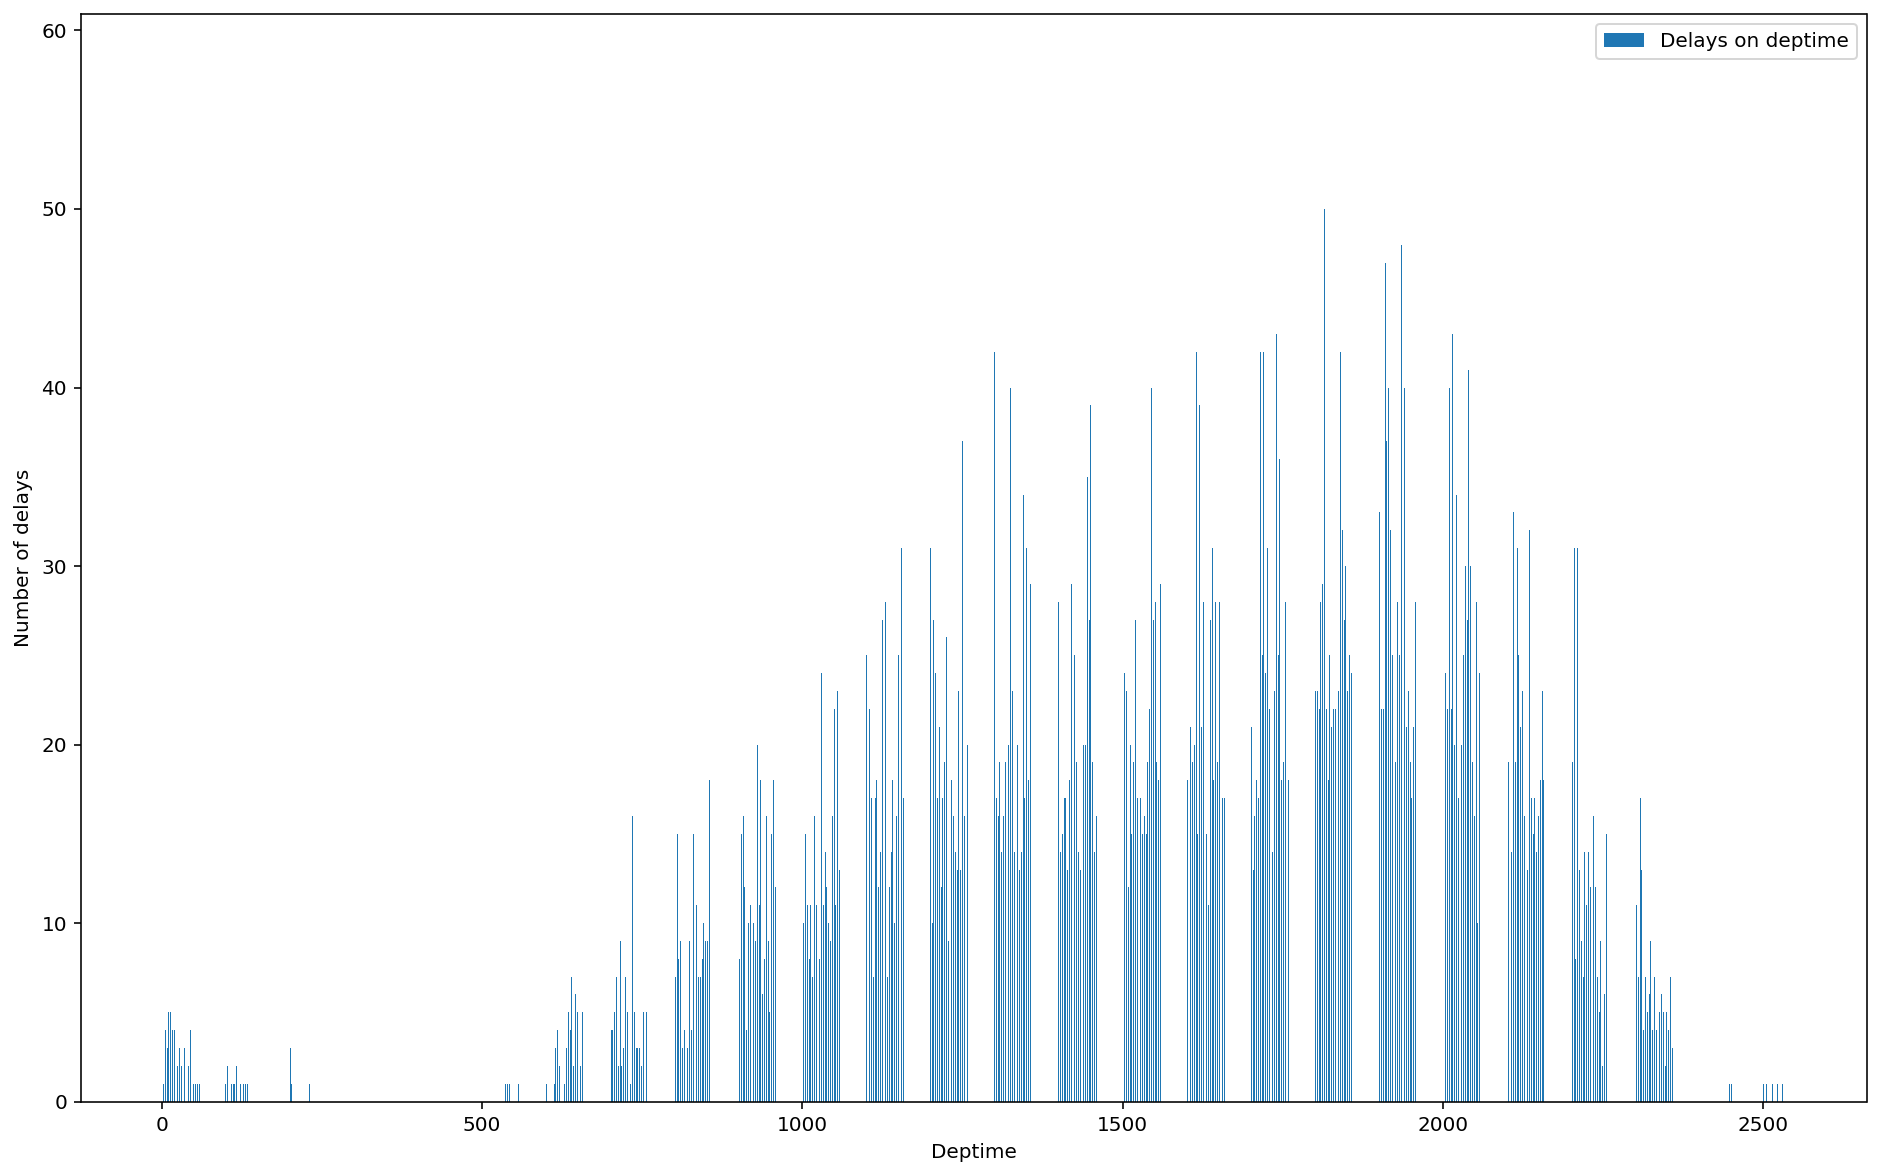

In [24]:
arr = df[df['dep_delayed_15min'] == 'Y'].groupby("DepTime").count().sort_values(by=['dep_delayed_15min'], ascending = False)[['dep_delayed_15min']]
arr=arr.iloc[:,0]
plt.figure(figsize=(16,10))
plt.bar(arr.index, arr.tolist(), width=.5, label = "Delays on deptime")
plt.xlabel("Deptime")
plt.legend()
plt.ylabel("Number of delays")

C:\Users\Пользователь\OneDrive\Рабочий стол\flight_delays.csv